In [5]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

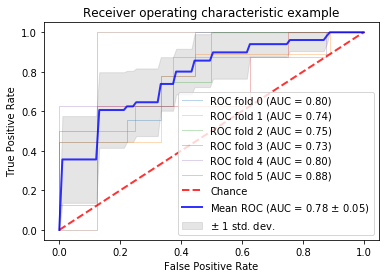

In [5]:
# #############################################################################
# Data IO and generation

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)

classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
"""
======================================================
Plotting sckit-learn classifiers comparison with Earth
======================================================

This script recreates the scikit-learn classifier comparison example found at
http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html.
It has been modified to include an Earth based classifier.
"""

# Code source: Gael Varoqueux
#              Andreas Mueller
# Modified for Documentation merge by Jaques Grobler
# License: BSD 3 clause
# Modified to include pyearth by Jason Rudy

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as QDA

from sklearn.linear_model.logistic import LogisticRegression
from sklearn.pipeline import Pipeline
from pyearth import Earth


Plotting sckit-learn classifiers comparison with Earth

This script recreates the scikit-learn classifier comparison example found at
http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html.
It has been modified to include an Earth based classifier.



D:\Program Files\ANACONA\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
D:\Program Files\ANACONA\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
D:\Program Files\ANACONA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Program Files\A

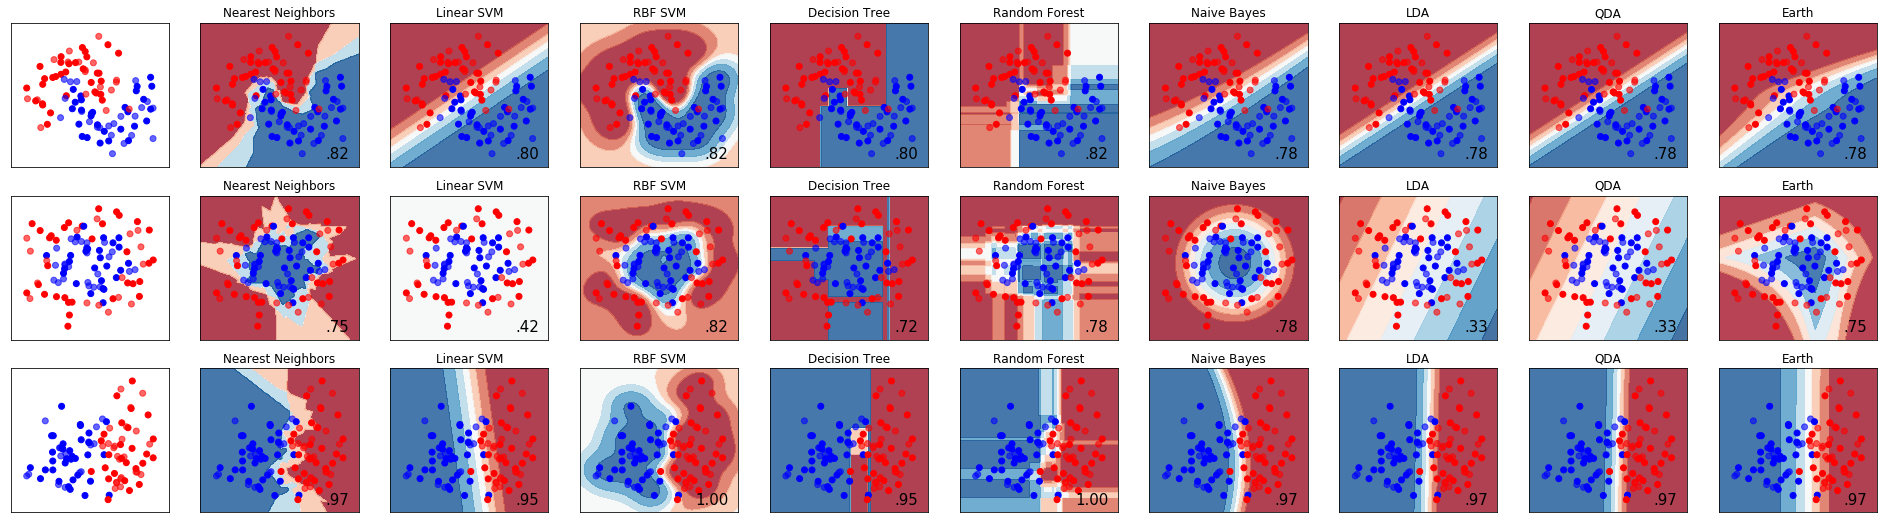

In [8]:
print(__doc__)

h = .02  # step size in the mesh

np.random.seed(1)

# Combine Earth with LogisticRegression in a pipeline to do classification
earth_classifier = Pipeline([('earth', Earth(max_degree=3, penalty=1.5)),
                             ('logistic', LogisticRegression())])

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "Naive Bayes", "LDA", "QDA", "Earth"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GaussianNB(),
    LDA(),
    QDA(),
    earth_classifier]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        try:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        except NotImplementedError:
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.savefig('classifier_comp.pdf', transparent=True)
plt.show()

[<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>]


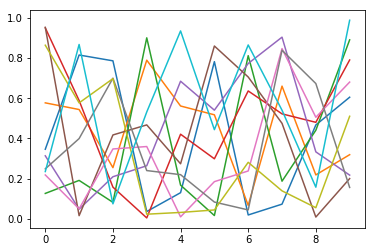

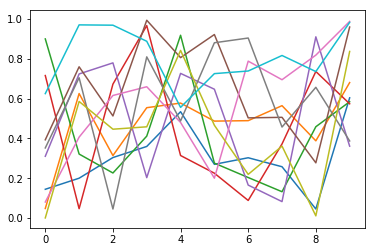

In [9]:
import numpy as np
import pylab
import matplotlib._pylab_helpers

x=np.random.random((10,10))
y=np.random.random((10,10))
pylab.figure()
pylab.plot(x)
pylab.figure()
pylab.plot(y)

figures=[manager.canvas.figure
         for manager in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
print(figures)

# [<matplotlib.figure.Figure object at 0xb788ac6c>, <matplotlib.figure.Figure object at 0xa143d0c>]

#for i, figure in enumerate(figures):
 #   figure.savefig('figure%d.png' % i)

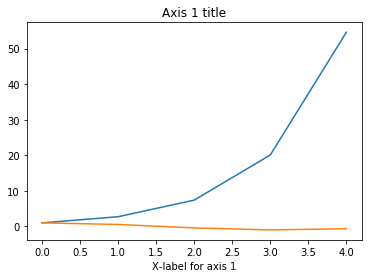

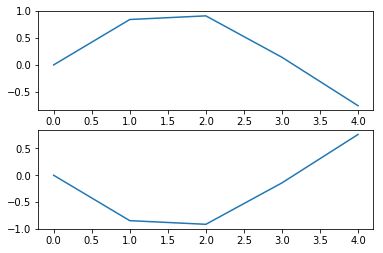

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(5)
y = np.exp(x)
fig1, ax1 = plt.subplots()
ax1.plot(x, y)
ax1.set_title("Axis 1 title")
ax1.set_xlabel("X-label for axis 1")

z = np.sin(x)
fig2, (ax2, ax3) = plt.subplots(nrows=2, ncols=1) # two axes on figure
ax2.plot(x, z)
ax3.plot(x, -z)

w = np.cos(x)
ax1.plot(x, w)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
linalg = np.linalg

N = 400
mean = [2,3]
cov = [[0.5, 0.5],[0.5,0.3]]
data = np.random.multivariate_normal(mean, cov, N)
data.mean(),np.var(data)
data_rv = multivariate_normal([2,3], [[0.5, 0.5],[0.5,0.3]])

D:\Program Files\ANACONA\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


ValueError: the input matrix must be positive semidefinite

In [1]:
import numpy as np
import matplotlib.pyplot as plt
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
plt.figure()
cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)
plt.title('Filled Contours Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

<Figure size 640x480 with 2 Axes>

D:\Program Files\ANACONA\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
D:\Program Files\ANACONA\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


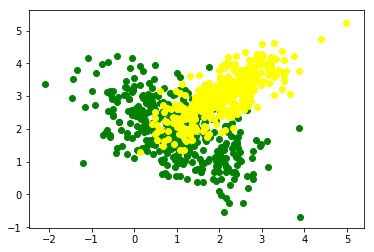

In [70]:
uncorrelated = np.random.standard_normal((2,N))
#data2 = np.dot(L,uncorrelated) + np.array(mean).reshape(2,1)
# print(data2.shape)
# (2, 1000)
plt.scatter(data2[:,0], data2[:,1], c='green')    
plt.scatter(data[:,0], data[:,1], c='yellow')

plt.show()

In [1]:
from scipy.stats import multivariate_normal
from sklearn.neighbors import KNeighborsClassifier

In [7]:
var = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
var.pdf()

In [6]:
print(var)
plt.show()
var.pdf([1,0])

0.09653235263005393

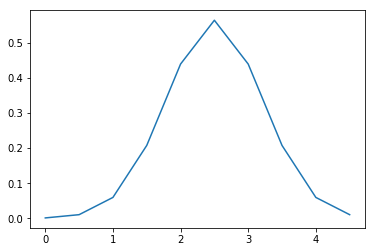

In [7]:
from scipy.stats import multivariate_normal
x = np.linspace(0, 5, 10, endpoint=False)
y = multivariate_normal.pdf(x, mean=2.5, cov=0.5); y
plt.plot(x, y)

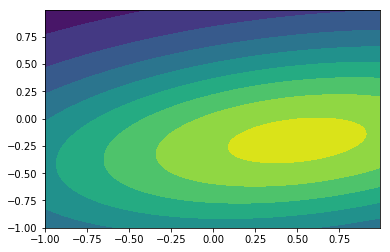

In [16]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
rv_data = np.random.multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]], 250)
plt.contourf(x, y, rv.pdf(pos))

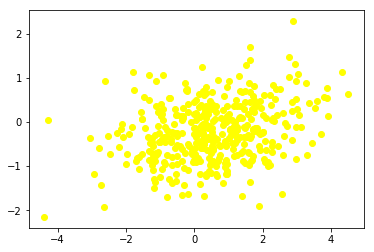

In [35]:
plt.scatter(rv_data[:,0], rv_data[:,1], c='yellow')

plt.show()

In [31]:
rv.pdf([.5,-0.2])

0.1668397135325737

In [ ]:
a = []
b = [1,2,3,9,7,8,8]
c = [1,2,9,8]
d = [9,0,1,2,8,11,10]
e = [8,7,-2 ,8,11]
f = [7,8,7,7,9,8]
test_case = [a,b,c,d,e,f]
"""
Here I listed two methods to bool the input which contains consecutive numers which are greater than 8.
As far as I know, Big O complexity is not often used with Python and numpy, it is often used in complied
language. Most calculations in np are O(n)
"""
# looping the whole array, time complexity O(n), n is length of given array
def bool_cst_method_0(a):
    for i in range(len(a)):
        if a[i]>=8 and i<len(a)-1 and (a[i+1]==a[i]+1 or a[i+1]==a[i]-1) and a[i+1]>=8:
            return True
    return False
for i in test_case:
    print('Case {} results: {}'.format(i,bool_array(i)))

In [ ]:
# get the index of value which is larger than 8, then looping the index list, 
#the built-in operation in Python is usually O(n)
def bool_cst_method_1(a):
    index_list = np.where(np.array(a) >=8)[0]
    for i in index_list:  
        if a[i]>=8 and i<len(a)-1 and (a[i+1]==a[i]+1 or a[i+1]==a[i]-1) and a[i+1]>=8:
            return True
    return False
for i in test_case:
    print('Case {} results: {}'.format(i,bool_array_method_1(i)))

In [2]:
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(samples) 

print(neigh.kneighbors([[1., 4., 1.]])) 


(array([[3.04138127, 3.77491722]]), array([[2, 1]], dtype=int64))


In [71]:
N = 250
mean0,cov0 = [1, -0.5], np.array([[1.0, 0.5], [0.5, 0.5]])
rv0 = multivariate_normal(mean0, cov0)
data0 = np.random.multivariate_normal(mean0, cov0, N)
data0.mean(),np.var(data0)

(0.23264565476363958, 1.3627667810955741)

In [72]:
points =[1,2]
mean0=np.array(mean0)

In [76]:
g0 = -0.5*np.dot(np.dot(points-mean0, np.linalg.inv(cov0)),(points-mean0).T) - 0.5*np.log(np.linalg.det(cov0))
g0

-11.806852819440055

In [83]:
X, Y = np.mgrid[-2:2:100j, -2:2:100j]
X.shape

(100, 100)

In [89]:
points = np.c_[X.ravel(), Y.ravel()]
points.shape

(10000, 2)

In [97]:
Z = -0.5*np.dot(np.dot(points-mean0, np.linalg.inv(cov0)),(points-mean0).T) - 0.5*np.log(np.linalg.det(cov0))
Z.shape

(10000, 10000)

In [114]:
point=[4,10]
np.sum(np.dot(point-mean0, np.linalg.inv(cov0)) * (point-mean0),axis = 0)

333.0

In [112]:
np.dot(np.dot(point-mean0, np.linalg.inv(cov0)),(point-mean0).T)

333.0

In [ ]:
g1 = -0.5*np.sum(np.dot(points-mean0, np.linalg.inv(cov0)) * (points-mean0), axis=1) - 0.5*np.log(np.linalg.det(cov0))
prob = np.exp(np.sum(np.dot(points-mean0, np.linalg.inv(cov0)) * (points-mean0), axis=1))*0.5*(1/np.pi)/np.sqrt(np.linalg.det(cov0))

In [125]:
prob=np.exp(g1)

In [127]:
prob.max()

1.999897972197446

In [22]:
np.linalg.inv(cov0)

matrix([[ 2., -2.],
        [-2.,  4.]])

In [23]:
np.linalg.det(cov0)

0.25

In [25]:
np.linalg.norm(cov0)

1.3228756555322954

In [84]:
import pylab as pl
import numpy as np

D = 2

M1 = np.array([0.0, 0.0])
M2 = np.array([1.0, 1.0])

C1 = np.array([[2.0, 0.4], [0.4, 1.0]])
C2 = np.array([[1.0, 0.6], [0.6, 2.0]])

In [85]:
X, Y = np.mgrid[-2:2:100j, -2:2:100j]
X.shape

(100, 100)

In [115]:
X, Y = np.mgrid[-2:2:100j, -2:2:100j]
points = np.c_[X.ravel(), Y.ravel()]

invC = np.linalg.inv(C1)
v = points - M1
g1 = -0.5*np.sum(np.dot(v, invC) * v, axis=0) - D*0.5*np.log(2*np.pi) - 0.5*np.log(np.linalg.det(C1))
g1.shape = 100, 100

invC = np.linalg.inv(C2)
v = points - M2
g2 = -0.5*np.sum(np.dot(v, invC) * v, axis=0) - D*0.5*np.log(2*np.pi) - 0.5*np.log(np.linalg.det(C2))
g2.shape = 100, 100
Z = g1 - g2

ValueError: cannot reshape array of size 2 into shape (100,100)

In [91]:
Z.shape

(100, 100)

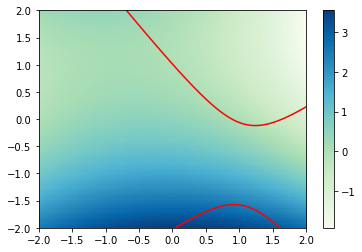

In [92]:
cp=plt.imshow(Z, interpolation='nearest',
           extent=(X.min(), X.max(), Y.min(), Y.max()), aspect='auto',
           origin='lower', cmap='GnBu')
plt.contour(X, Y, Z,[0],colors=['red'])
plt.colorbar(cp)

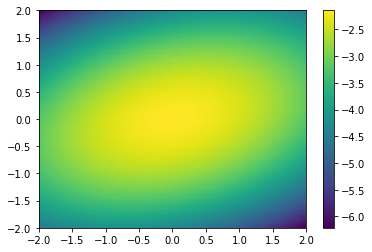

In [93]:
cp = plt.pcolormesh(X, Y, g1)
plt.colorbar(cp)

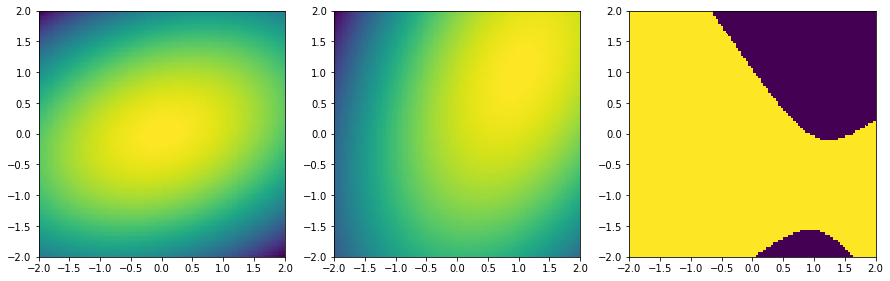

In [94]:
fig, axes = pl.subplots(1, 3, figsize=(15, 5))
ax1, ax2, ax3 = axes.ravel()
for ax in axes.ravel():
    ax.set_aspect("equal")

ax1.pcolormesh(X, Y, g1)
ax2.pcolormesh(X, Y, g2)
ax3.pcolormesh(X, Y, g1 > g2)